In [58]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [59]:
#load model
model = VGG16()

In [60]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [61]:
from keras.utils import plot_model

In [62]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [63]:
#!pip install pydot

In [64]:
# here we filter out convolutional layer in model

for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
        continue
    filters, bias = model.layers[i].get_weights()
    print("layer number",i,model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [65]:
# retrieve weights from the second hidden layer which convolutional layer
filters , bias = model.layers[1].get_weights()

In [66]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [67]:
f_min

-0.67140007

In [68]:
f_max

0.6085159

In [69]:
filters.shape
#(rows, columns, channels, filter)

(3, 3, 3, 64)

In [70]:
filters[:,:,:,0]

array([[[0.8601116 , 0.9545779 , 0.89960235],
        [0.81635594, 0.8683965 , 0.8437643 ],
        [0.47662497, 0.4609779 , 0.4736674 ]],

       [[0.7392438 , 0.7946921 , 0.767142  ],
        [0.55478704, 0.55631167, 0.5637889 ],
        [0.23765364, 0.17024457, 0.20940173]],

       [[0.47966576, 0.47875416, 0.48481962],
        [0.31966972, 0.2662131 , 0.3017171 ],
        [0.25103468, 0.145611  , 0.19757837]]], dtype=float32)

In [71]:
import matplotlib.pyplot as plt

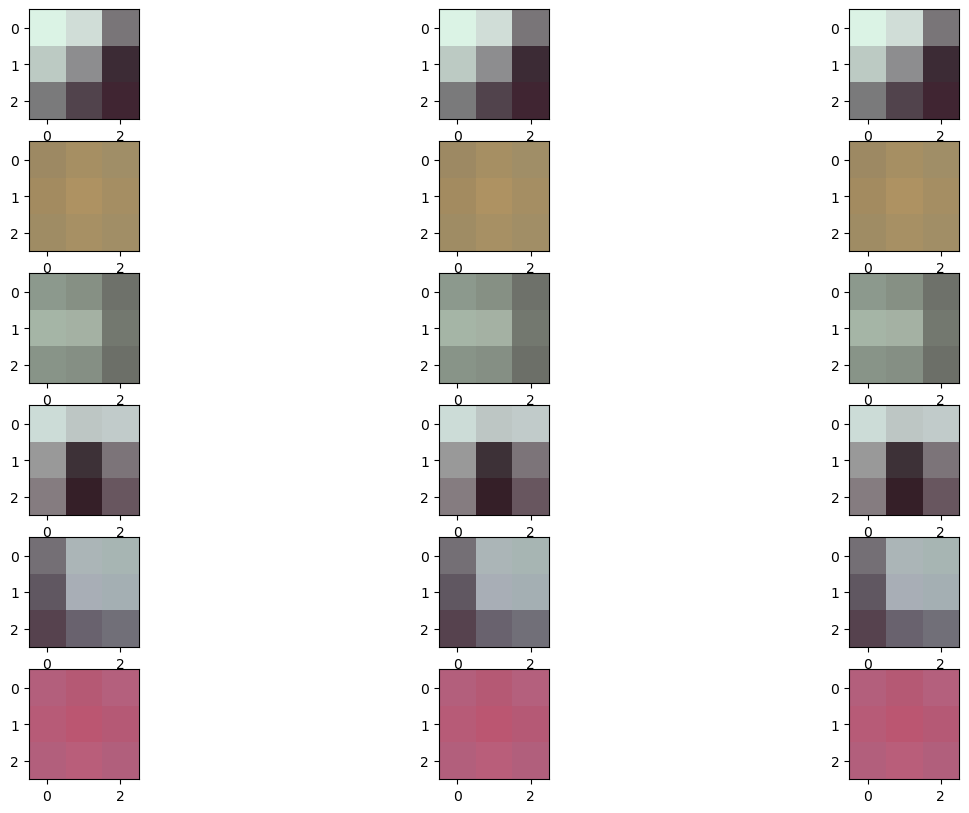

In [72]:
# random 6 filters
n_filters = 6
# for position of image
ix=1

fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    
    f= filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:,:,:], cmap='gray')
        ix+=1
        
plt.show()

In [73]:
'''
n_filters = 6
ix = 1
fig = pyplot.figure(figsize=(15, 10))
n_filters = 6: This variable represents the number of filters. In this case, there are 6 filters.
ix = 1: This is an index variable that will be used to assign a position to each subplot in the figure.
fig = pyplot.figure(figsize=(15, 10)): This line initializes a figure for plotting with a specified size of 15 inches in width 
and 10 inches in height.

python
Copy code
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        pyplot.subplot(n_filters, 3, ix)
        pyplot.imshow(f[:,:,j], cmap='gray')
        ix += 1
        
The outer loop (for i in range(n_filters)) iterates over the range of n_filters (which is 6 in this case). This loop is 
responsible for iterating through each filter.

Inside the outer loop, f = filters[:,:,:,i] extracts the i-th filter from a 4D array of filters. Each filter has dimensions (height, width, channels) 
where channels corresponds to the number of color channels (e.g., 3 for RGB).

The inner loop (for j in range(3)) iterates over the range of 3. This loop is used to iterate through 
the color channels of the filter (typically red, green, and blue).

pyplot.subplot(n_filters, 3, ix) sets up a subplot within the figure. The arguments n_filters, 3, and ix determine 
the number of rows, number of columns, and the position of the subplot within the grid.

pyplot.imshow(f[:,:,j], cmap='gray') displays the image data in the current subplot. f[:,:,j] selects the image data for 
the j-th color channel of the current filter. The cmap='gray' argument specifies that the colormap should be grayscale.
ix += 1 increments the index variable, so the next subplot will be positioned correctly.

python
Copy code
pyplot.show()

This line displays the complete figure containing all the subplots of filter visualizations.
In summary, the provided code snippet creates a figure with a grid of subplots, each containing an 
image visualization of a filter from a set of filters. The code iterates through the filters 
and their color channels to display how each filter responds to different aspects of the input data. 
This kind of visualization is often used to understand what kind of features each filter is detecting in a 
convolutional neural network.

'''

"\nn_filters = 6\nix = 1\nfig = pyplot.figure(figsize=(15, 10))\nn_filters = 6: This variable represents the number of filters. In this case, there are 6 filters.\nix = 1: This is an index variable that will be used to assign a position to each subplot in the figure.\nfig = pyplot.figure(figsize=(15, 10)): This line initializes a figure for plotting with a specified size of 15 inches in width \nand 10 inches in height.\n\npython\nCopy code\nfor i in range(n_filters):\n    f = filters[:,:,:,i]\n    for j in range(3):\n        pyplot.subplot(n_filters, 3, ix)\n        pyplot.imshow(f[:,:,j], cmap='gray')\n        ix += 1\n        \nThe outer loop (for i in range(n_filters)) iterates over the range of n_filters (which is 6 in this case). This loop is \nresponsible for iterating through each filter.\n\nInside the outer loop, f = filters[:,:,:,i] extracts the i-th filter from a 4D array of filters. Each filter has dimensions (height, width, channels) \nwhere channels corresponds to the numb

In [74]:
# now here we taking pretrained model train another model by taking previous model input andd output

In [75]:
from keras.models import Model
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

In [76]:
from keras.preprocessing import image
from numpy import expand_dims

In [77]:
img = image.load_img('Aditya Gaikwad.jpeg', target_size=(224,224))

In [82]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from numpy import expand_dims

# Load an image using Keras' image.load_img or any other method
img_path = "Aditya Gaikwad.jpeg"
img = image.load_img(img_path, target_size=(224, 224))  # Resizing to VGG16 input size

# Convert the image to an array
img_array = image.img_to_array(img)

# Expand dimensions to create a batch-like structure
expanded_img_array = expand_dims(img_array, axis=0)

# Preprocess the image array for VGG16 model
preprocessed_img_array = preprocess_input(expanded_img_array)

1/1 [==============================] - 4s 4s/step


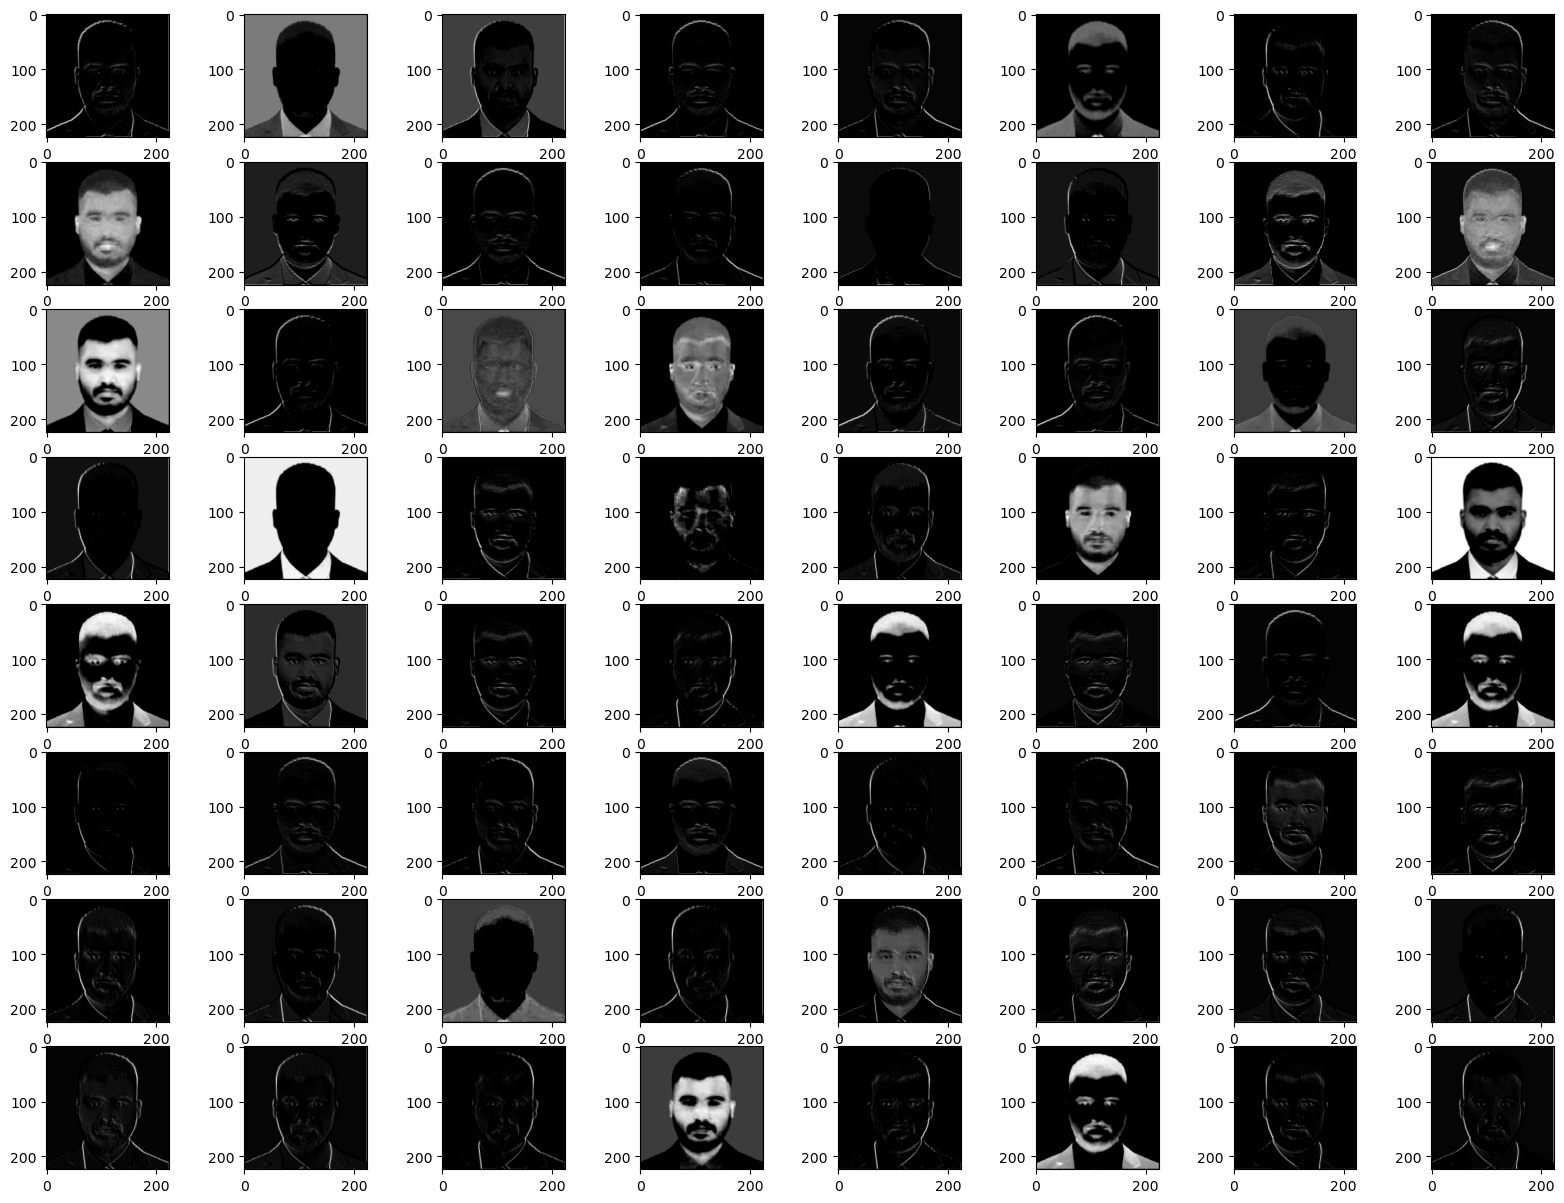

In [83]:
#calculating features_map
features = model.predict(preprocessed_img_array)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()

In [84]:
# creating another model

In [85]:
model2 = VGG16()

In [86]:
# conv layer index in VGG16 model
layer_index = [ 2, 5 , 9 , 13 , 17]

In [87]:
# taking output of that con layer
output = [model2.layers[i].output for i in layer_index]

In [88]:
# feeding to the next model

In [90]:
model3 = Model(inputs=model2.inputs, outputs = model2.outputs)

In [92]:
feature_map = model3.predict(preprocessed_img_array)

1/1 [==============================] - 4s 4s/step


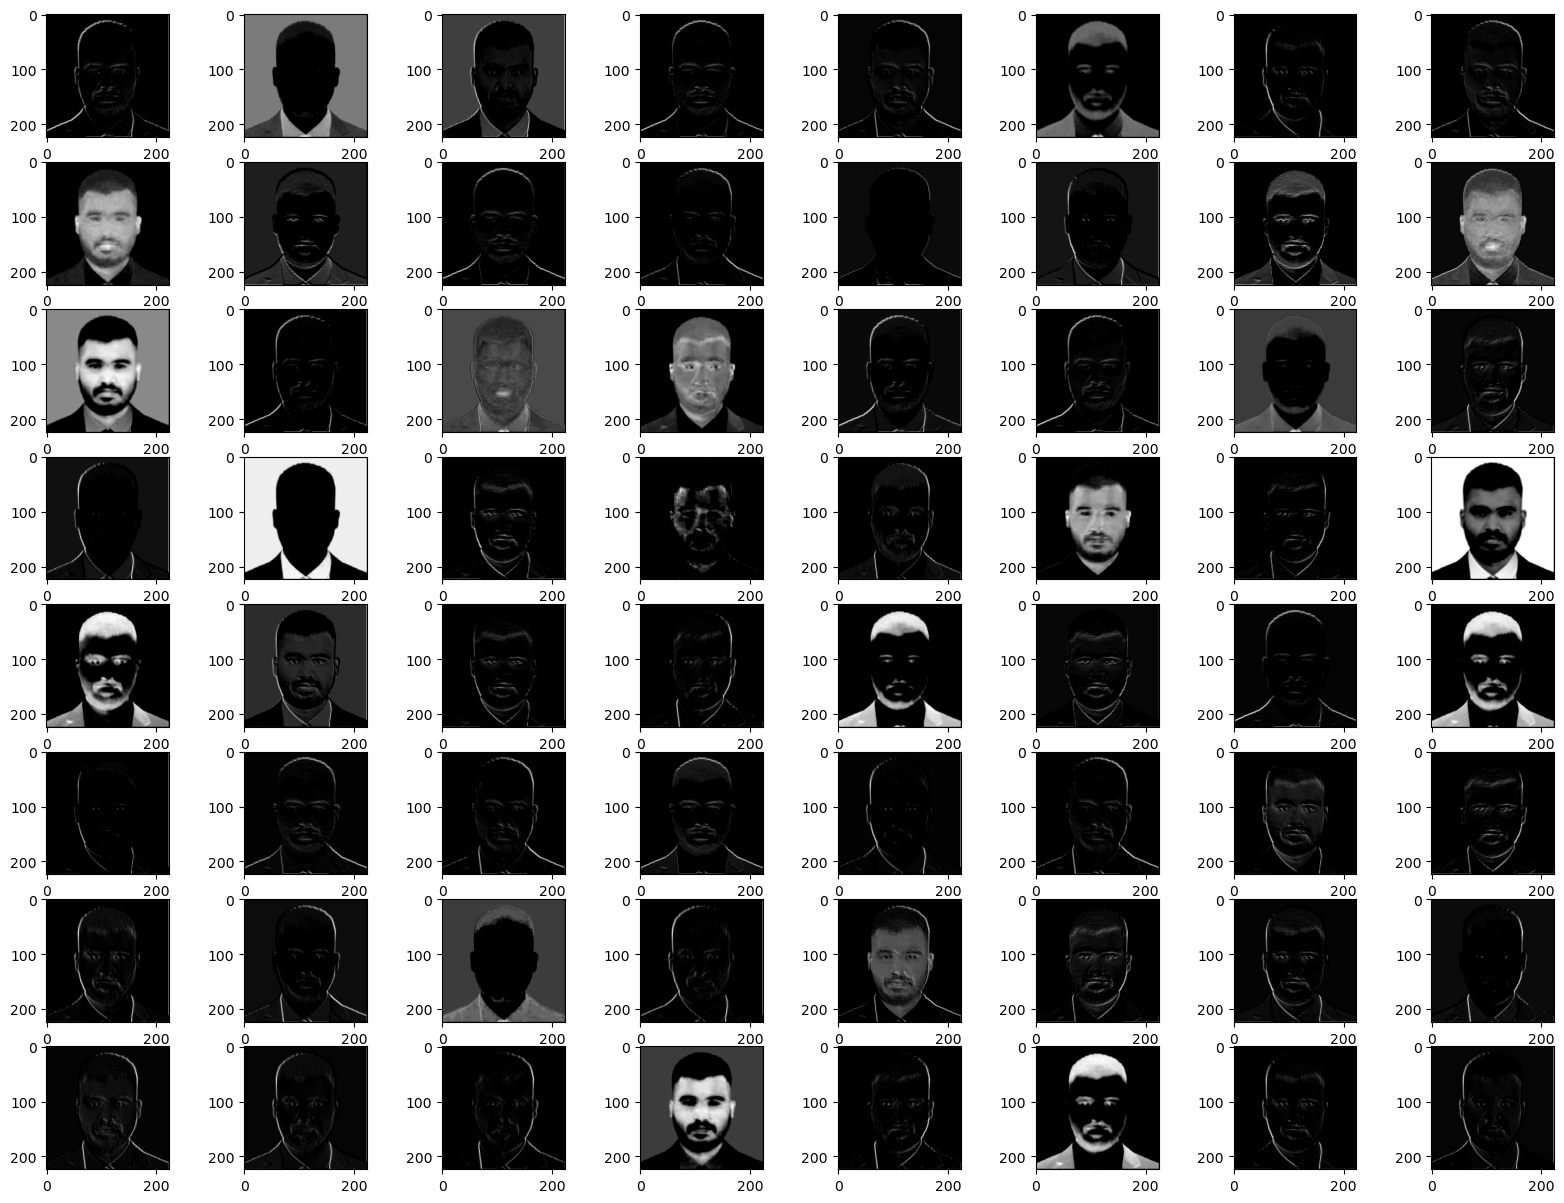

In [93]:
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()